In [1]:
 
from fastai import *
from fastai.vision import *
import torch.onnx
from torch.autograd import Variable
import os
os.environ["TORCH_HOME"] = "/media/subhaditya/DATA/COSMO/Datasets-Useful"
 

In [2]:
path = Path("/media/subhaditya/DATA/COSMO/Datasets/bengali/Images/")
 

In [3]:
data = (ImageList.from_folder(path)
       .split_by_rand_pct()
        .label_from_folder()
        .transform(get_transforms(),size = 64)
       ).databunch(bs = 64).normalize(imagenet_stats)
 

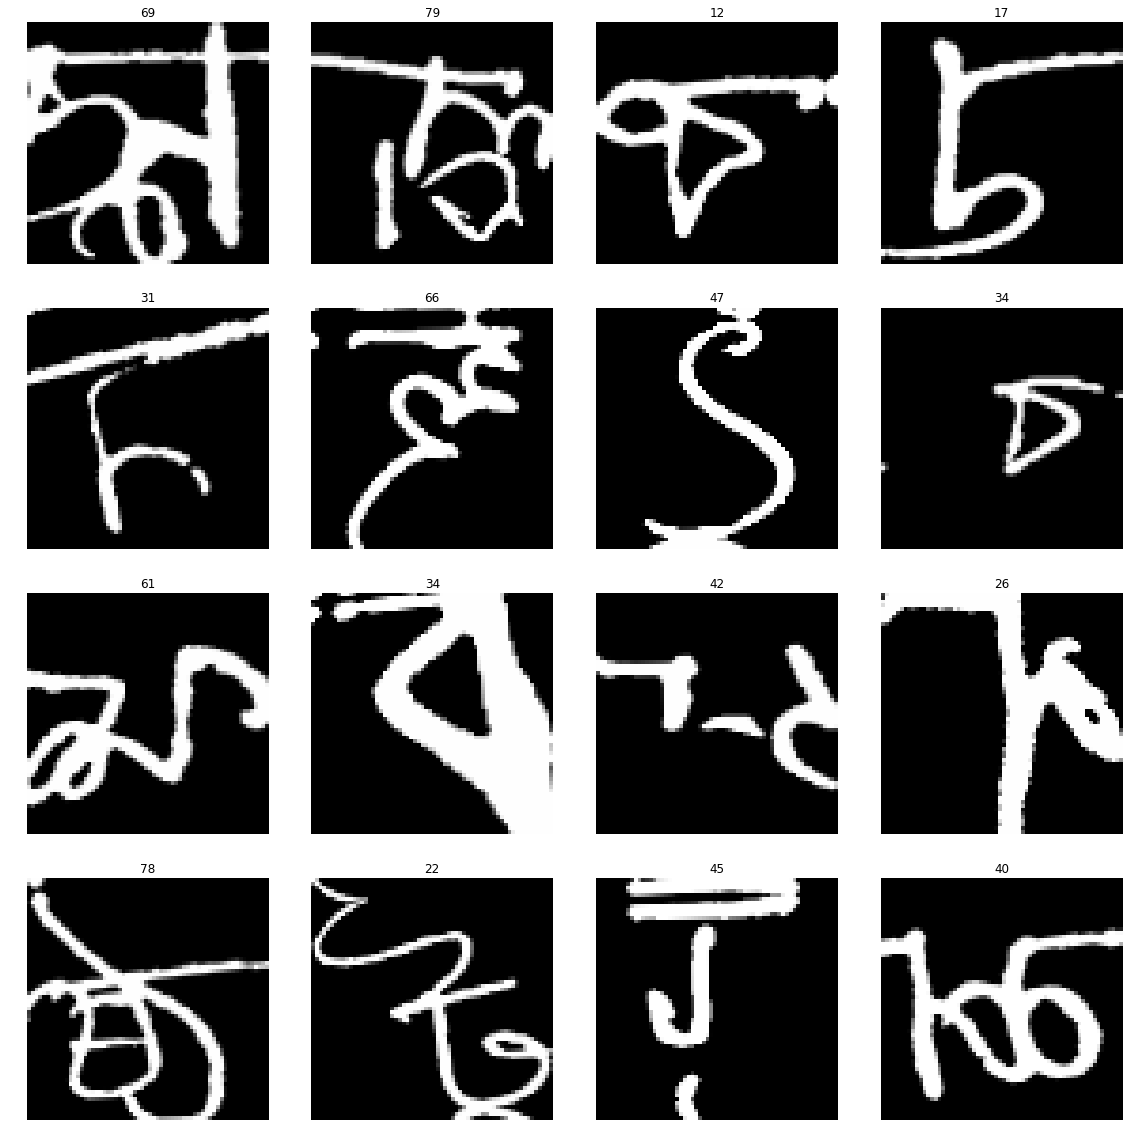

In [4]:
data.show_batch(4)
 

In [5]:
data.c
 

84

In [9]:
learn = None
gc.collect()

8069

In [10]:
learn = cnn_learner(
    data, models.resnet50, metrics=[accuracy], opt_func=AdamW, callback_fns=ShowGraph
).to_fp16()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


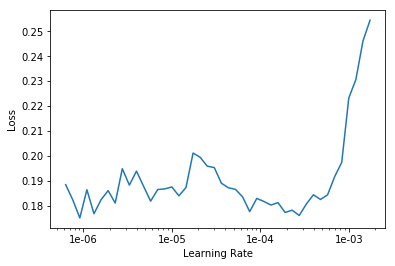

In [13]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.364874,0.305737,0.917974,02:35
1,0.561336,0.391130,0.895006,02:37
2,0.495979,0.419552,0.887210,02:38
3,0.401728,0.350871,0.908070,02:47
4,0.345687,0.295063,0.920743,02:44
5,0.317052,0.256933,0.929713,02:39
6,0.256441,0.230116,0.938202,02:39
7,0.216904,0.216746,0.943409,02:40
8,0.166067,0.209115,0.945697,02:39
9,0.171632,0.208440,0.946359,02:41


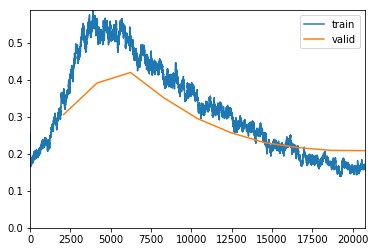

In [14]:
learn.unfreeze()
learn.fit_one_cycle(10, 6e-4, wd = 10e-3)
 

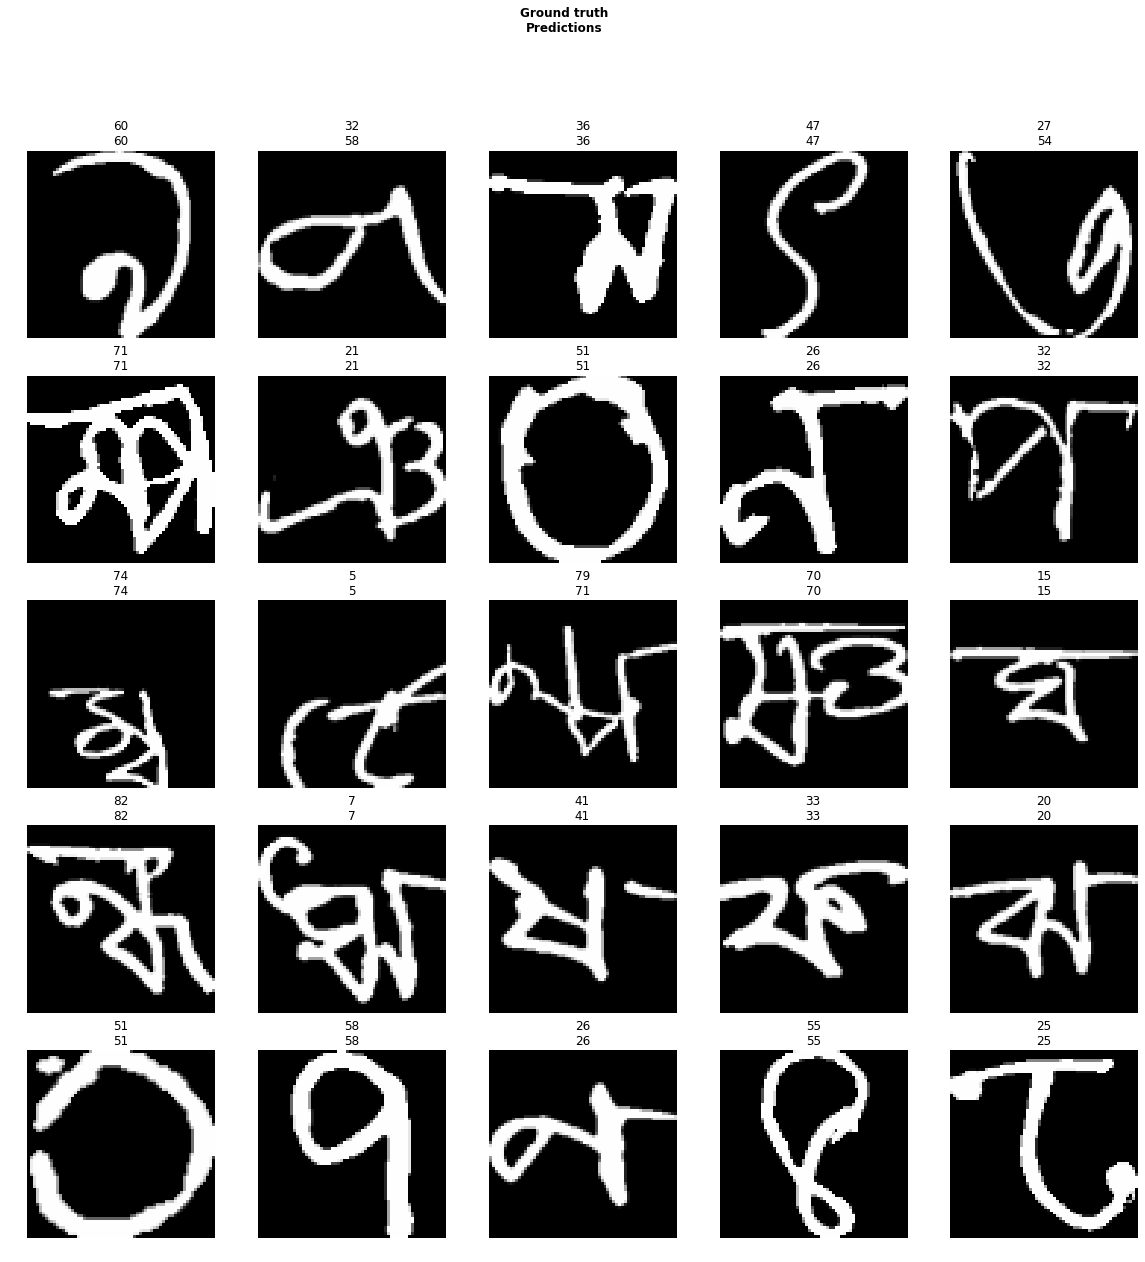

In [15]:
learn.show_results()

In [ ]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_top_losses(9, figsize=(7,7))

# deeper

In [16]:
learn = None
gc.collect()

60503

In [18]:
from torch.optim import *

In [19]:
learn = cnn_learner(
    data, models.resnet50, metrics=[accuracy], opt_func=RMSprop, callback_fns=ShowGraph
).to_fp16()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


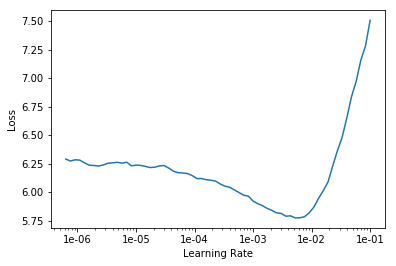

In [20]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,4.849871,3.790926,0.137503,02:31
1,2.847532,1.970351,0.512357,02:31
2,1.556057,0.934656,0.747630,02:33
3,1.065128,0.617935,0.830198,02:32
4,0.831176,0.502226,0.863550,02:33
5,0.677769,0.443005,0.880858,02:33
6,0.656804,0.406345,0.890491,02:35
7,0.564906,0.388741,0.896662,02:37
8,0.594902,0.380034,0.899612,02:33
9,0.558149,0.378445,0.899612,02:34


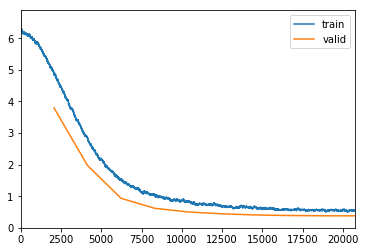

In [21]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-6, wd = 10e-4)
 